## Imports

In [167]:
import numpy as np
import h5py
import re
import random
from itertools import compress
import itertools
import math
from operator import itemgetter
import sys
from Bio import Phylo

## Read in data

In [119]:
fname = "ran_sample_trees/test.dat"
with open(fname) as f:
    sequences = f.readlines()
# remove whitespace characters like `\n` at the end of each line
sequences = [x.strip() for x in sequences] 
sequences.pop(0)

'10 10000'

In [120]:
names = [sequences[i][0:10].strip(" ") for i in range(len(sequences))]
iso_sequences = [sequences[i][10:].strip(" ") for i in range(len(sequences))]

taxa_ids = [3,2,8,9,4]
fivetaxa = [names[i] for i in taxa_ids]

In [121]:
tempobj = [iso_sequences[i] for i in taxa_ids]
tempobj

['CTGATCATTAAGAAGCATGCACCGTCAGATATTGATTCCGTACCTACTCTGGTTCCATTCTAGAAAAGGCACGATAGCCACTGCATCTTCTGTCCGGGACGAGACCCGGCGCCCTACTTGCGGATTCTTTGTTCGATCTTATCACATTCCTTCCAGCAAACGCCGCGTTGTCCCCTCACGGACCTATACGTCCCACCATGGGCCCTTCTCAACTGGTAGCGAGTCTTGTCGGGCGCGTGTAGTGATTCTCTTCACCGAAAATGAAGCGAGAACGTTTAGACCTGGATATCCGGGGCCCTAATACGCCCTTGATTATATCGAACTTACTGGCGCCTACACAATATCGTGACCAATAAAAATAACTCCAGTCGCCGCCATACGTACTCTAATCCGGTGGCGTAAATCATTTCCTGTCGAGCAAAAGCTTTGCGATGGTGGAGTTGTTTCAAAAAGGCCCTTTCCGATGCACCAACGTCGAGTCCTTACTTGATCGGACCCGTACAATCTGCGCTTGGTGGCCACCCTCGGTCAATGGAAAACCCGAAGTATCCACGAAACGATGGTTTGGGGGATTTGATTTTTAGCGCCAATGTTCCGTTTGACCACTCACTAACGGATCGACCCCACTAAGCAATGATGACTCTGTGGATGACGTGTGAACTCAAAGTAACTATATCAGCGCTTGCGGAGATCGAGTCTCTCCAGTGGGGCTTACAAGACCTTTTTCGTTTTTGGTCTGACTAGCCGTTTCGCAAATCTATGTCAAACGACCTTTAAGCCGGCTAACTGATGCTCTCTACTAACTATCCTCAGTGGCGCAGAGGAACACGAACTAAATCAGCGAGGCGCGCGTGCGAAGGTATTGAGAAAAGGAGTTGACTATGAGATACCGCTGCCCATTTGGTGGGCCCCATCGCGACGGCCCATGGGGTCGGTCAAAGATTTATGGACCTGCTGCAGCGAGAAGAGTATTAATACGATACTAGGACGAGAAGCAT

### Snps only!

In [122]:
ind_samples = []
for i in range(len(tempobj[0])):
    currentbase = ([tempobj[q][i] for q in range(len(tempobj))])
    if (len(set(currentbase)) > 1):
        ind_samples.append(currentbase)
ind_samples_reset = ind_samples

In [123]:
ind_samples = np.array(ind_samples_reset)
ind_samples = np.where(ind_samples=='A',0,ind_samples)
ind_samples = np.where(ind_samples=='C',1,ind_samples)
ind_samples = np.where(ind_samples=='G',2,ind_samples)
ind_samples = np.where(ind_samples=='T',3,ind_samples)
ind_samples = ind_samples.astype(int)

Asamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 0])[:,[1,2,3,4]]
Csamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 1])[:,[1,2,3,4]]
Gsamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 2])[:,[1,2,3,4]]
Tsamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 3])[:,[1,2,3,4]]

In [124]:
allmats = []
info = []
reshuffle_fifth = [[0,1,2,3,4],[1,0,2,3,4],[2,0,1,3,4],[3,0,1,2,4],[4,0,1,2,3]]

for w in range(len(reshuffle_fifth)):

    current_taxa_ids = [taxa_ids[i] for i in reshuffle_fifth[w]]

    ind_samples = np.array(ind_samples_reset)[:,reshuffle_fifth[w]]
    ind_samples = np.where(ind_samples=='A',0,ind_samples)
    ind_samples = np.where(ind_samples=='C',1,ind_samples)
    ind_samples = np.where(ind_samples=='G',2,ind_samples)
    ind_samples = np.where(ind_samples=='T',3,ind_samples)
    ind_samples = ind_samples.astype(int)


    Asamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 0])[:,[1,2,3,4]]
    Csamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 1])[:,[1,2,3,4]]
    Gsamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 2])[:,[1,2,3,4]]
    Tsamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 3])[:,[1,2,3,4]]

    snparrays = [Asamples,Csamples,Gsamples,Tsamples]
    for q in range(len(snparrays)):
        for p in [[0,1,2,3],[0,2,1,3],[0,3,1,2]]:
            indexmat = np.array(range(16))
            indexmat.shape=(4,4)
            # order across matrix is 00,01,02,03,10,11,12,13,20,21,22,23,30,31,32,33
            fullmat0123 = np.zeros(shape=(16,16))
            arr0123 = snparrays[q][:,p]
            for i in range(len(arr0123)):
                        # get row number 
                rownum = int(indexmat[arr0123[i][0],arr0123[i][1]])
                        # get col number
                colnum = int(indexmat[arr0123[i][2],arr0123[i][3]])
                fullmat0123[rownum,colnum] = fullmat0123[rownum,colnum] + 1
            allmats.append(fullmat0123)
            info.append([current_taxa_ids,q,np.array(current_taxa_ids[1:5])[p]])

In [125]:
info

[[[3, 2, 8, 9, 4], 0, array([2, 8, 9, 4])],
 [[3, 2, 8, 9, 4], 0, array([2, 9, 8, 4])],
 [[3, 2, 8, 9, 4], 0, array([2, 4, 8, 9])],
 [[3, 2, 8, 9, 4], 1, array([2, 8, 9, 4])],
 [[3, 2, 8, 9, 4], 1, array([2, 9, 8, 4])],
 [[3, 2, 8, 9, 4], 1, array([2, 4, 8, 9])],
 [[3, 2, 8, 9, 4], 2, array([2, 8, 9, 4])],
 [[3, 2, 8, 9, 4], 2, array([2, 9, 8, 4])],
 [[3, 2, 8, 9, 4], 2, array([2, 4, 8, 9])],
 [[3, 2, 8, 9, 4], 3, array([2, 8, 9, 4])],
 [[3, 2, 8, 9, 4], 3, array([2, 9, 8, 4])],
 [[3, 2, 8, 9, 4], 3, array([2, 4, 8, 9])],
 [[2, 3, 8, 9, 4], 0, array([3, 8, 9, 4])],
 [[2, 3, 8, 9, 4], 0, array([3, 9, 8, 4])],
 [[2, 3, 8, 9, 4], 0, array([3, 4, 8, 9])],
 [[2, 3, 8, 9, 4], 1, array([3, 8, 9, 4])],
 [[2, 3, 8, 9, 4], 1, array([3, 9, 8, 4])],
 [[2, 3, 8, 9, 4], 1, array([3, 4, 8, 9])],
 [[2, 3, 8, 9, 4], 2, array([3, 8, 9, 4])],
 [[2, 3, 8, 9, 4], 2, array([3, 9, 8, 4])],
 [[2, 3, 8, 9, 4], 2, array([3, 4, 8, 9])],
 [[2, 3, 8, 9, 4], 3, array([3, 8, 9, 4])],
 [[2, 3, 8, 9, 4], 3, array([3, 

In [ ]:
[math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)]

In [126]:
testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][0:12]
print(sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]))
print(sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]))
print(sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]]))
testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][12:24]
print(sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]))
print(sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]))
print(sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]]))
testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][24:36]
print(sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]))
print(sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]))
print(sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]]))
testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][36:48]
print(sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]))
print(sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]))
print(sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]]))
testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][48:60]
print(sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]))
print(sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]))
print(sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]]))

1.47588643358
1.67894070956
3.48787949115
1.6009131894
1.58048179426
3.38605873141
1.81165703449
1.86911436949
2.38068276844
2.06359369527
2.10092448935
1.84817934956
2.8379797551
1.79969736676
1.615987715


In [131]:
testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][0:12]
first_out = [sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]),
 sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]),
 sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]])]
testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][12:24]
second_out = [sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]),
 sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]),
 sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]])]
testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][24:36]
third_out = [sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]),
 sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]),
 sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]])]
testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][36:48]
fourth_out = [sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]),
 sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]),
 sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]])]
testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][48:60]
fifth_out = [sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]),
 sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]),
 sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]])]

## Get the resulting chosen quintet (first is the out-taxon, second two are pairs)

In [236]:
max_index, max_value = max(enumerate([max(i) for i in [first_out,second_out,third_out,fourth_out,fifth_out]]), key=itemgetter(1))
max_index_quart, max_value_quart = max(enumerate([first_out,second_out,third_out,fourth_out,fifth_out][max_index]), key=itemgetter(1))
correct_out = [taxa_ids[i] for i in reshuffle_fifth[max_index]]
predicted_all = [correct_out[0]]+[correct_out[i+1] for i in [[0,1,2,3],[0,2,1,3],[0,3,1,2]][max_index_quart]]
predicted_names = [names[i] for i in predicted_all]
predicted_names


['t1', 't2', 't5', 't3', 't4']

## Read tree from file

In [168]:
tree = Phylo.read('ran_sample_trees/sample_10_1.phy', 'newick')

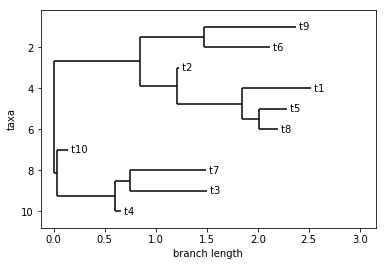

In [172]:
Phylo.draw(tree)

## Get all distances

In [276]:
tipnames = [names[i] for i in taxa_ids]
indexing = np.array([[0,1],[0,2],[0,3],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]])

alldists = [tree.distance(tipnames[0],tipnames[1]),
 tree.distance(tipnames[0],tipnames[2]),
 tree.distance(tipnames[0],tipnames[3]),
 tree.distance(tipnames[0],tipnames[4]),
 tree.distance(tipnames[1],tipnames[2]),
 tree.distance(tipnames[1],tipnames[3]),
 tree.distance(tipnames[1],tipnames[4]),
 tree.distance(tipnames[2],tipnames[3]),
 tree.distance(tipnames[2],tipnames[4]),
 tree.distance(tipnames[3],tipnames[4])]

min_tree_pairs1, min_pair_val1 = min(enumerate(alldists), key=itemgetter(1))
alldists.pop(min_tree_pairs1)
min_tree_pairs2, min_pair_val2 = min(enumerate(alldists), key=itemgetter(1))

paired_taxa =  [tipnames[i] for i in list(indexing[min_tree_pairs1])] + [tipnames[i] for i in list(indexing[min_tree_pairs2])]
out_taxon = list(set(tipnames) ^ set(paired_taxa))

actual_quintet = out_taxon + paired_taxa

actual_quintet


['t1', 't3', 't4', 't2', 't5']

In [277]:
truepred, falsepred = 0,0
if ((set(actual_quintet[1:3]) == set(predicted_names[3:5])) or (set(actual_quintet[1:3]) == set(predicted_names[1:3]))) and (actual_quintet[0] == predicted_names[0]):
    return(1)
else:
    return(0)



In [280]:
def compare_quint_pred_actual(sequencedata, phylogeny):
    # read in data

    fname = sequencedata
    with open(fname) as f:
        sequences = f.readlines()

    # remove whitespace characters like `\n` at the end of each line

    sequences = [x.strip() for x in sequences] 
    sequences.pop(0)

    # get sequences  and identify quintet taxa
    names = [sequences[i][0:10].strip(" ") for i in range(len(sequences))]
    iso_sequences = [sequences[i][10:].strip(" ") for i in range(len(sequences))]
    
    # so we're only testing one possible quintet per tree... Easy to expand this to test every quintet per tree
    taxa_ids = [3,2,8,9,4]
    fivetaxa = [names[i] for i in taxa_ids]

    tempobj = [iso_sequences[i] for i in taxa_ids]

    # eliminate non-snps

    ind_samples = []
    for i in range(len(tempobj[0])):
        currentbase = ([tempobj[q][i] for q in range(len(tempobj))])
        if (len(set(currentbase)) > 1):
            ind_samples.append(currentbase)
    ind_samples_reset = ind_samples

    # separate sequences by fifth taxon

    ind_samples = np.array(ind_samples_reset)
    ind_samples = np.where(ind_samples=='A',0,ind_samples)
    ind_samples = np.where(ind_samples=='C',1,ind_samples)
    ind_samples = np.where(ind_samples=='G',2,ind_samples)
    ind_samples = np.where(ind_samples=='T',3,ind_samples)
    ind_samples = ind_samples.astype(int)

    Asamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 0])[:,[1,2,3,4]]
    Csamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 1])[:,[1,2,3,4]]
    Gsamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 2])[:,[1,2,3,4]]
    Tsamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 3])[:,[1,2,3,4]]

    # get the matrices

    allmats = []
    info = []
    reshuffle_fifth = [[0,1,2,3,4],[1,0,2,3,4],[2,0,1,3,4],[3,0,1,2,4],[4,0,1,2,3]]

    for w in range(len(reshuffle_fifth)):

        current_taxa_ids = [taxa_ids[i] for i in reshuffle_fifth[w]]

        ind_samples = np.array(ind_samples_reset)[:,reshuffle_fifth[w]]
        ind_samples = np.where(ind_samples=='A',0,ind_samples)
        ind_samples = np.where(ind_samples=='C',1,ind_samples)
        ind_samples = np.where(ind_samples=='G',2,ind_samples)
        ind_samples = np.where(ind_samples=='T',3,ind_samples)
        ind_samples = ind_samples.astype(int)


        Asamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 0])[:,[1,2,3,4]]
        Csamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 1])[:,[1,2,3,4]]
        Gsamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 2])[:,[1,2,3,4]]
        Tsamples = np.array([ind_samples[i] for i in range(len(ind_samples)) if ind_samples[i][0] == 3])[:,[1,2,3,4]]

        snparrays = [Asamples,Csamples,Gsamples,Tsamples]
        for q in range(len(snparrays)):
            for p in [[0,1,2,3],[0,2,1,3],[0,3,1,2]]:
                indexmat = np.array(range(16))
                indexmat.shape=(4,4)
                # order across matrix is 00,01,02,03,10,11,12,13,20,21,22,23,30,31,32,33
                fullmat0123 = np.zeros(shape=(16,16))
                arr0123 = snparrays[q][:,p]
                for i in range(len(arr0123)):
                            # get row number 
                    rownum = int(indexmat[arr0123[i][0],arr0123[i][1]])
                            # get col number
                    colnum = int(indexmat[arr0123[i][2],arr0123[i][3]])
                    fullmat0123[rownum,colnum] = fullmat0123[rownum,colnum] + 1
                allmats.append(fullmat0123)
                info.append([current_taxa_ids,q,np.array(current_taxa_ids[1:5])[p]])

    # predict the true quintet

    testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][0:12]
    first_out = [sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]),
     sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]),
     sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]])]
    testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][12:24]
    second_out = [sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]),
     sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]),
     sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]])]
    testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][24:36]
    third_out = [sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]),
     sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]),
     sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]])]
    testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][36:48]
    fourth_out = [sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]),
     sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]),
     sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]])]
    testing = [math.sqrt(np.sum(np.square(np.linalg.svd(allmats[i])[1][10:15]))) for i in range(60)][48:60]
    fifth_out = [sum([testing[i] for i in [1,2,4,5,7,8,10,11]])/sum([testing[i] for i in [0,3,6,9]]),
     sum([testing[i] for i in [0,2,3,5,6,8,9,11]])/sum([testing[i] for i in [1,4,7,10]]),
     sum([testing[i] for i in [0,1,3,4,6,7,9,10]])/sum([testing[i] for i in [2,5,8,11]])]

    max_index, max_value = max(enumerate([max(i) for i in [first_out,second_out,third_out,fourth_out,fifth_out]]), key=itemgetter(1))
    max_index_quart, max_value_quart = max(enumerate([first_out,second_out,third_out,fourth_out,fifth_out][max_index]), key=itemgetter(1))
    correct_out = [taxa_ids[i] for i in reshuffle_fifth[max_index]]
    predicted_all = [correct_out[0]]+[correct_out[i+1] for i in [[0,1,2,3],[0,2,1,3],[0,3,1,2]][max_index_quart]]
    predicted_names = [names[i] for i in predicted_all]

    # compare with actual quintet

    tree = Phylo.read(phylogeny, 'newick')

    tipnames = [names[i] for i in taxa_ids]
    indexing = np.array([[0,1],[0,2],[0,3],[0,4],[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]])

    alldists = [tree.distance(tipnames[0],tipnames[1]),
     tree.distance(tipnames[0],tipnames[2]),
     tree.distance(tipnames[0],tipnames[3]),
     tree.distance(tipnames[0],tipnames[4]),
     tree.distance(tipnames[1],tipnames[2]),
     tree.distance(tipnames[1],tipnames[3]),
     tree.distance(tipnames[1],tipnames[4]),
     tree.distance(tipnames[2],tipnames[3]),
     tree.distance(tipnames[2],tipnames[4]),
     tree.distance(tipnames[3],tipnames[4])]

    min_tree_pairs1, min_pair_val1 = min(enumerate(alldists), key=itemgetter(1))
    alldists.pop(min_tree_pairs1)
    min_tree_pairs2, min_pair_val2 = min(enumerate(alldists), key=itemgetter(1))

    paired_taxa =  [tipnames[i] for i in list(indexing[min_tree_pairs1])] + [tipnames[i] for i in list(indexing[min_tree_pairs2])]
    out_taxon = list(set(tipnames) ^ set(paired_taxa))

    actual_quintet = out_taxon + paired_taxa

    # return 1 if the predicted quintet matches the actual one, 0 if not
    if ((set(actual_quintet[1:3]) == set(predicted_names[3:5])) or (set(actual_quintet[1:3]) == set(predicted_names[1:3]))) and (actual_quintet[0] == predicted_names[0]):
        return(1)
    else:
        return(0)

In [281]:
compare_quint_pred_actual(sequencedata = "ran_sample_trees/test.dat", phylogeny = 'ran_sample_trees/sample_10_1.phy')

1